In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.express as px
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import root_mean_squared_error, r2_score
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE # For handling imbalanced data
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
df = pd.read_csv('../data/loan_data.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2498 entries, 0 to 2497
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   interest_rate               2498 non-null   float64
 1   fico_range                  2498 non-null   object 
 2   amount_requested            2498 non-null   float64
 3   amount_funded_by_investors  2498 non-null   float64
 4   loan_length                 2498 non-null   float64
dtypes: float64(4), object(1)
memory usage: 97.7+ KB


In [4]:
df['fico_start']=pd.to_numeric(df['fico_range'].str.split("-").str[0], errors="coerce")

In [5]:
df['fico_start']

0       735
1       715
2       690
3       695
4       695
       ... 
2493    705
2494    740
2495    680
2496    675
2497    670
Name: fico_start, Length: 2498, dtype: int64

In [6]:
df['fico_stop']=pd.to_numeric(df['fico_range'].str.split("-").str[1], errors="coerce")

In [7]:
df = df.drop(['fico_range', 'fico_stop'], axis=1)

In [8]:
df.columns


Index(['interest_rate', 'amount_requested', 'amount_funded_by_investors',
       'loan_length', 'fico_start'],
      dtype='object')

In [17]:
def useOLS(X, y):
    X = sm.add_constant(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )   
    imputer = SimpleImputer(strategy='mean')
    scaler = MinMaxScaler()
    X_train = imputer.fit_transform(X_train)
    X_test = imputer.fit_transform(X_test)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    model = sm.OLS(y_train, X_train).fit()
    y_pred_test = model.predict(X_test)
    residuals = model.resid
    test_residuals = y_test - y_pred_test
    print(model.summary())
    plt.scatter(y_pred_test, test_residuals) 
    plt.axhline(0, color="red")
    plt.show()

In [10]:
df.columns


Index(['interest_rate', 'amount_requested', 'amount_funded_by_investors',
       'loan_length', 'fico_start'],
      dtype='object')

c:\Users\sheeh\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


                                 OLS Regression Results                                
Dep. Variable:          interest_rate   R-squared (uncentered):                   0.756
Model:                            OLS   Adj. R-squared (uncentered):              0.755
Method:                 Least Squares   F-statistic:                              1542.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):                        0.00
Time:                        17:53:05   Log-Likelihood:                         -6655.5
No. Observations:                1998   AIC:                                  1.332e+04
Df Residuals:                    1994   BIC:                                  1.334e+04
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

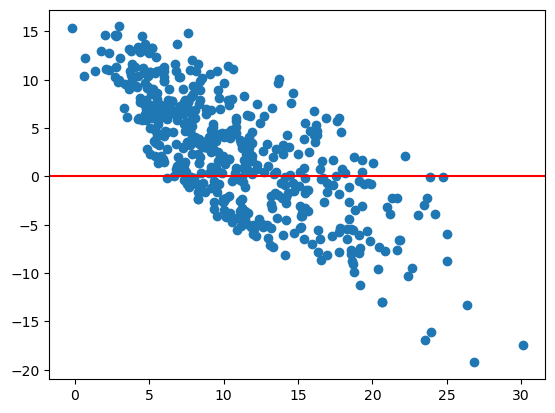

In [18]:
# X= All
def initial_model(df, dropped):
    features = []
    for x in df.columns:  
        if x not in dropped:
            features.append(x)
    return features

features = initial_model(df, ['interest_rate'])
X= df[features]
y = df['interest_rate']
useOLS(X,y)

c:\Users\sheeh\anaconda3\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


                                 OLS Regression Results                                
Dep. Variable:          interest_rate   R-squared (uncentered):                   0.709
Model:                            OLS   Adj. R-squared (uncentered):              0.709
Method:                 Least Squares   F-statistic:                              4876.
Date:                Fri, 21 Nov 2025   Prob (F-statistic):                        0.00
Time:                        17:53:10   Log-Likelihood:                         -6828.7
No. Observations:                1998   AIC:                                  1.366e+04
Df Residuals:                    1997   BIC:                                  1.367e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

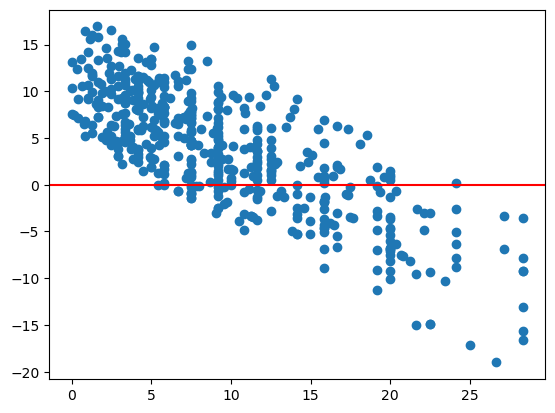

In [19]:
# X= Amount Requested

def initial_model(df, dropped):
    features = []
    for x in df.columns:  
        if x not in dropped:
            features.append(x)
    return features

features = initial_model(df, ['interest_rate', 'amount_funded_by_investors',
       'loan_length', 'fico_start'])
X= df[features]
y = df['interest_rate']
useOLS(X,y)